In [77]:
import pandas as pd # bibloteca para tratamento e manipulação de dados
import numpy as np # biblioteca para trabalhar com arrays (são como listas) - vetores
import seaborn as sns # gráficos mais elaborados
import matplotlib.pyplot as plt # biblioteca gráfica
from scipy.stats import norm # biblioteca para cálculos estatísticos

In [85]:
dados = "https://www.edsonmelo.com.br/dados_csv/notas_alunos.csv"
df = pd.read_csv(dados)

In [86]:
df.head()

,Nome,Nota1,Nota2,Nota3,Nota4,Nota5
0,Abel Marques,3.78,9.0,2.0,3.0,9.0
1,Abigail Camillo,8.00,2.0,7.0,2.0,2.0
2,Adriana Passos,8.00,6.0,1.0,6.0,2.0
3,Ajuricaba Casquero,6.00,4.0,5.0,10.0,10.0
4,Aline Beltrán,0.00,2.0,9.0,2.0,3.0


In [87]:
# eliminar colunas que não servem para cálculos
df = df.drop(['Nome'], axis=1)  # axisi é o eixo (0=linha e 1=coluna)
df.head()

,Nota1,Nota2,Nota3,Nota4,Nota5
0,3.78,9.0,2.0,3.0,9.0
1,8.00,2.0,7.0,2.0,2.0
2,8.00,6.0,1.0,6.0,2.0
3,6.00,4.0,5.0,10.0,10.0
4,0.00,2.0,9.0,2.0,3.0


In [89]:
# converter o nome das colunas para caixa baixa (minúsculas)
df.rename(columns={
    'Nota1': 'nota1',
    'Nota2': 'nota2',
    'Nota3': 'nota3',
    'Nota4': 'nota4',
    'Nota5': 'nota5'
    }, inplace=True) # inplace faz a alteração no dataset
df.head()

,nota1,nota2,nota3,nota4,nota5
0,3.78,9.0,2.0,3.0,9.0
1,8.00,2.0,7.0,2.0,2.0
2,8.00,6.0,1.0,6.0,2.0
3,6.00,4.0,5.0,10.0,10.0
4,0.00,2.0,9.0,2.0,3.0


In [91]:
# visualizandos as estatísticas
df.describe() # descricação dos dados

,nota1,nota2,nota3,nota4,nota5
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.737200,5.760000,4.480000,5.520000,5.620000
std,2.992104,3.034227,2.936331,3.382066,3.069867
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,3.000000,3.000000
50%,5.500000,6.500000,4.500000,5.500000,6.000000
75%,7.000000,8.000000,7.000000,8.000000,8.000000
max,9.080000,10.000000,9.000000,10.000000,10.000000


# Análise Exploratória dos Dados

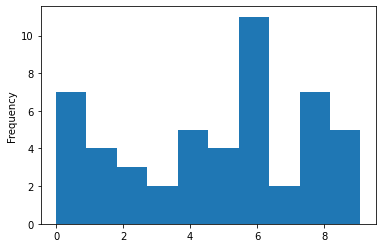

In [97]:
# desenhando um histograma ( mostra a distribuição dos dados)
# Distribuição 1-D (uma dimensão)
df['nota1'].plot(kind='hist')
plt.show()

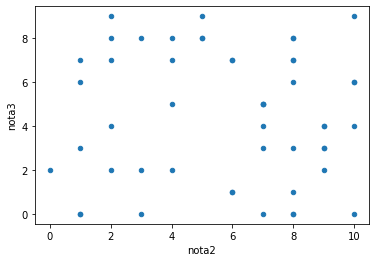

In [103]:
# vamos analisar dispersão
# depende de dois eixos (x, y)
# Analisar a nota1 em relação a nota2
df.plot(x='nota2', y='nota3', kind='scatter')
plt.show()

In [104]:
# vamos melhorar os dados, criando uma média
df['media'] = (df['nota1'] + df['nota2']+df['nota3']+df['nota4']+df['nota5']) / 5

In [105]:
df.head()

,nota1,nota2,nota3,nota4,nota5,media
0,3.78,9.0,2.0,3.0,9.0,5.356
1,8.00,2.0,7.0,2.0,2.0,4.200
2,8.00,6.0,1.0,6.0,2.0,4.600
3,6.00,4.0,5.0,10.0,10.0,7.000
4,0.00,2.0,9.0,2.0,3.0,3.200


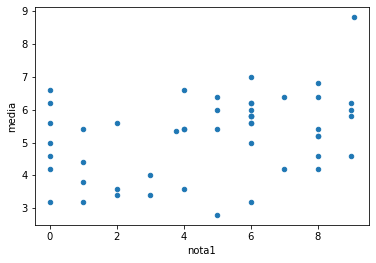

In [106]:
df.plot(x='nota1', y='media', kind='scatter')
plt.show()

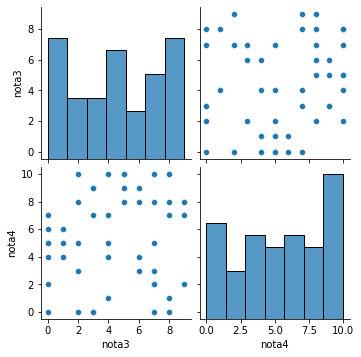

In [109]:
# Vamos usar o gráfico PairPlot (Correlação)
sns.pairplot( df.loc[:, 'nota3':'nota4'])

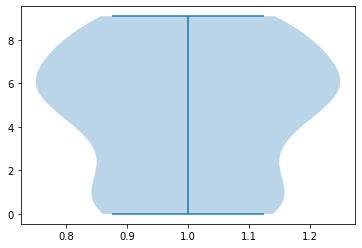

In [110]:
# Violin
plt.violinplot(df['nota1'])
plt.show()

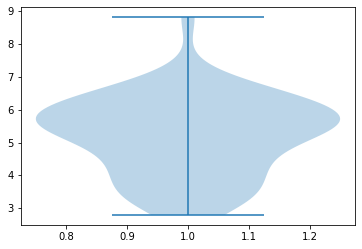

In [113]:
plt.violinplot(df['media'])
plt.show()

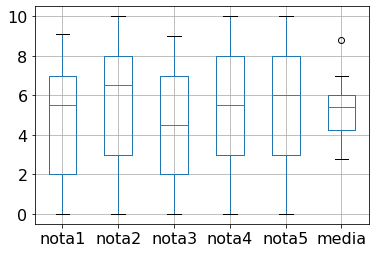

In [116]:
# Gráfico para visualização de intervalos de valores
# boxplot ou diagram de caixa
# Esse gráfico indica a variablidade dos dados
df.boxplot(
    column=['nota1', 'nota2', 'nota3', 'nota4', 'nota5', 'media'],
     grid=True, 
     fontsize=16)

In [118]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 

import pylab as pl
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
%matplotlib inline

In [119]:
df = df.drop(['media'], axis=1)

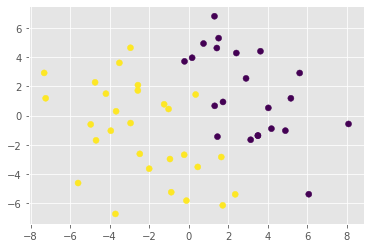

In [122]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=500, max_iter=50000, random_state=111, algorithm='elkan', precompute_distances=True, tol=0.0001)
kmeans.fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
pca = PCA(n_components=2).fit_transform(df)
pl.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_)
pl.show()